<a href="https://colab.research.google.com/github/thrkingunknown/Traffic-congestion/blob/main/Traffic_conjestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
preethamgouda_banglore_city_traffic_dataset_path = kagglehub.dataset_download('preethamgouda/banglore-city-traffic-dataset')

print('Data source import complete.')

Using Colab cache for faster access to the 'banglore-city-traffic-dataset' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banglore-city-traffic-dataset/Banglore_traffic_Dataset.csv


# Introduction and Data Loading
This dataset captures detailed traffic patterns across major roads and intersections in Bangalore.

In [ ]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(preethamgouda_banglore_city_traffic_dataset_path, 'Banglore_traffic_Dataset.csv')

df = pd.read_csv(csv_file_path)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# EDA of the Dataset

# 1. Heat Map

In [ ]:
heatmap_data = df.pivot_table(values='Traffic Volume', index='Area Name', columns='Road/Intersection Name', aggfunc='sum')
fig = px.imshow(heatmap_data, labels=dict(x="Road/Intersection Name", y="Area Name", color="Traffic Volume"),
                title="Heatmap of Traffic Volume Across Areas and Roads")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>This heatmap reveals that certain areas, such as Koramangala and Indiranagar, have consistently higher traffic volumes across multiple roads. This indicates that these regions are significant traffic hubs.</div></b>

# 2. SunBurst Chart


In [ ]:
fig = px.sunburst(df, path=['Area Name', 'Road/Intersection Name'], values='Traffic Volume',
                  title="Sunburst Chart of Traffic Volume by Area, Road, and Intersection")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>The Sunburst chart shows that within major areas like Koramangala and Indiranagar, specific roads such as Sony World Junction and 100 Feet Road dominate traffic volumes, indicating key pressure points in these localities.</div></b>

# 3. Scatter Plot

In [ ]:
fig = px.scatter(df, x='Traffic Volume', y='Average Speed', color='Congestion Level',
                 size='Traffic Volume', hover_data=['Area Name', 'Road/Intersection Name'],
                 title="Scatter Plot of Traffic Volume vs. Average Speed with Congestion Level")
fig.show()


<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>This plot shows an inverse relationship between traffic volume and average speed. Areas with high traffic volumes, like Indiranagar, tend to have lower speeds, which correlates with higher congestion levels.</div></b>

# 4. BoxPlot

In [ ]:
fig = px.box(df, x='Area Name', y='Travel Time Index',
             title="Box Plot of Travel Time Index by Area")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Koramangala shows a higher spread in the Travel Time Index, indicating variability in travel efficiency. This suggests that travel times in Koramangala are less predictable, likely due to varying traffic conditions.</div></b>

# 5. PieChart

In [ ]:
incident_data = df.groupby('Area Name')['Incident Reports'].sum().reset_index()
fig = px.pie(incident_data, values='Incident Reports', names='Area Name',
             title="Pie Chart of Incident Reports by Area")
fig.show()


<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>M.G. Road and Koramangala account for a significant portion of traffic incidents, suggesting these areas might need more traffic management and safety measures.</div></b>

# 6. Histogram

In [ ]:
fig = px.histogram(df, x='Road Capacity Utilization', nbins=20,
                   title="Histogram of Road Capacity Utilization")
fig.show()


<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>The histogram shows that a large portion of roads are utilized at or near their full capacity. This indicates a potential need for infrastructure expansion or traffic flow optimization to prevent overloading..</div></b>

# 7. RadialBar Chart

In [ ]:
congestion_data = df.groupby('Area Name')['Congestion Level'].mean().reset_index()
fig = px.bar_polar(congestion_data, r='Congestion Level', theta='Area Name',
                   title="Radial Bar Chart of Congestion Levels by Area")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Areas like M.G. Road and Koramangala exhibit consistently high congestion levels, which may require targeted traffic management interventions to alleviate pressure.</div></b>

# 8. Density Plot

In [ ]:
fig = px.density_contour(df, x='Average Speed', y='Traffic Volume',
                         title="Density Plot of Average Speed and Traffic Volume")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>The density plot reveals that most traffic operates within a specific range of speeds, with a concentration of data points where speeds are moderate and traffic volumes are high. This suggests common traffic flow patterns across the city.</div></b>

# 9. Stacked Bar Chart

In [ ]:
fig = px.histogram(df, x='Weather Conditions', y='Traffic Volume', color='Area Name',
                   barmode='stack', title="Stacked Bar Chart of Traffic Volume by Weather Conditions")
fig.show()

<b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Clear weather conditions see higher traffic volumes across all areas, indicating that weather has a significant impact on road usage, with adverse conditions potentially reducing traffic.</div></b>

# K-Means Clustering.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level',
    'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
    'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
    'Pedestrian and Cyclist Count'
]
numerical_data = df[numerical_columns]

<b><div style='padding:50px;background-color:#334DE0;color:white;border-radius:80px;font-size:120%;text-align: center'><p>

Data Standardization:

The numerical data is standardized using StandardScaler() to ensure all features have a mean of 0 and a standard deviation of 1.

Dimensionality Reduction with PCA:

Principal Component Analysis (PCA) is applied to reduce the dimensionality of the data to 2 components, which simplifies clustering.
    </p></div></b>

In [ ]:
# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

<b><div style='padding:50px;background-color:#334DE0;color:white;border-radius:80px;font-size:120%;text-align: center'><p>

Elbow Method for Optimal k:

The Elbow Method is used to determine the optimal number of clusters (k) by plotting the inertia (within-cluster sum of squares) for different values of k and selecting the point where the inertia starts to level off.
    </p></div></b>

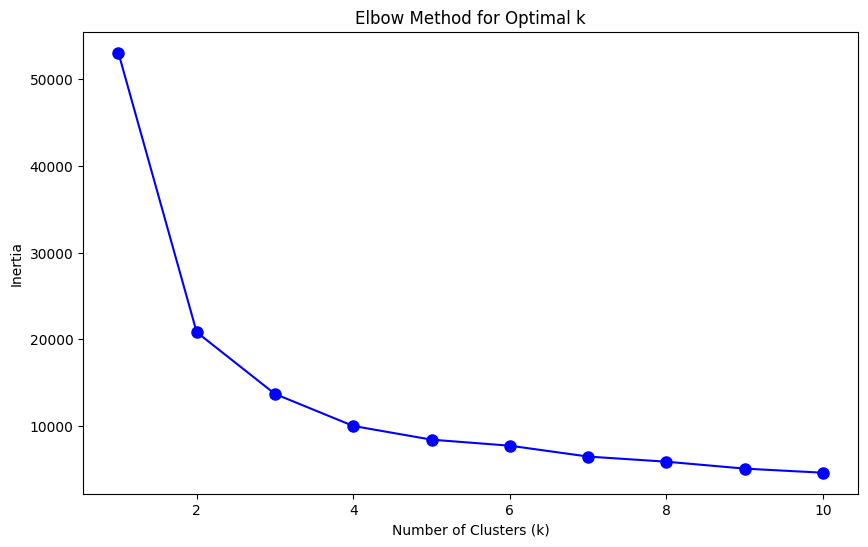

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


<b><div style='padding:50px;background-color:#334DE0;color:white;border-radius:80px;font-size:120%;text-align: center'><p>
K-means Clustering:

K-means clustering is performed on the PCA-reduced data with the selected optimal number of clusters (k=2), and the cluster labels are assigned to the original dataset.
Cluster Visualization and Analysis:

The clusters are visualized on a 2D plot based on the PCA components, and boxplots are created to compare the original features across different clusters, helping to understand the characteristics of each cluster.
    </p></div></b>

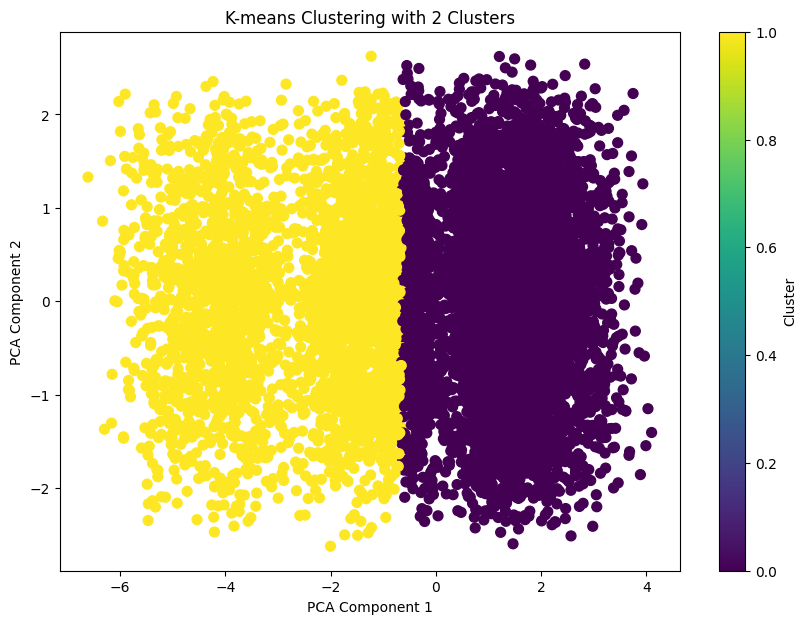

          0         1
0  1.357056  0.001392
1 -2.658391 -0.002726


In [ ]:

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data)
df['Cluster'] = kmeans.labels_

# Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Inspect Cluster Centers in Original Feature Space
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)

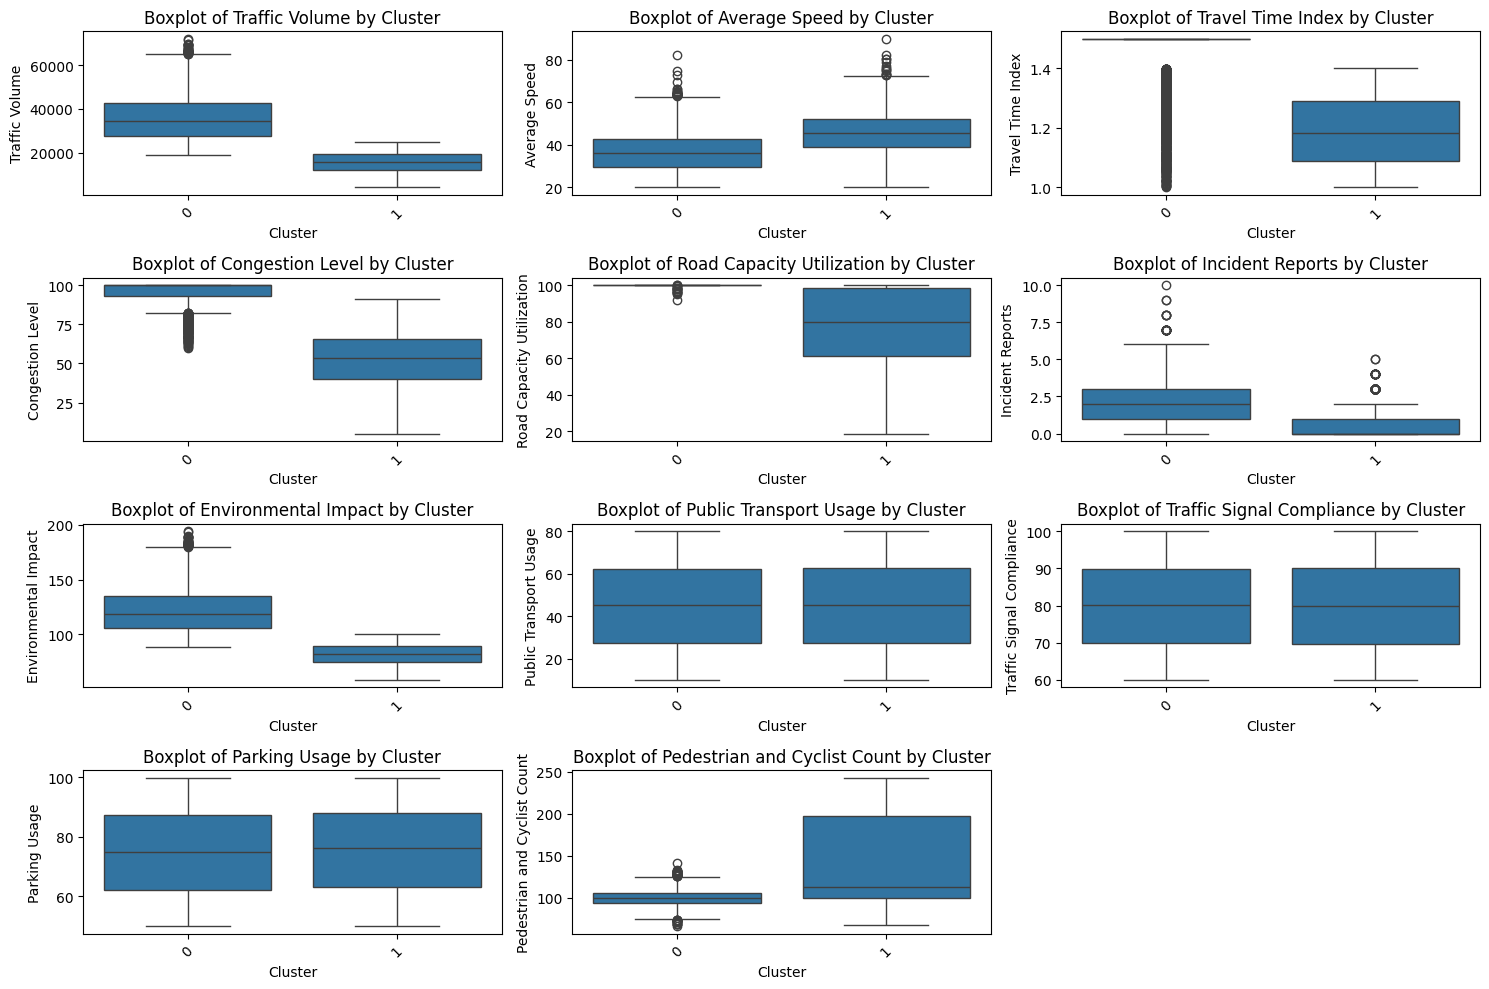

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<b><div style='padding:50px;background-color:#001BC7;color:white;border-radius:80px;font-size:120%;text-align: center'>
    Cluster 0:
</div></b>    


<b><div style='padding:50px;background-color:#99A0FF;color:white;border-radius:80px;font-size:120%;text-align: center'><p>Cluster 0 predominantly represents areas with lower traffic volumes and moderate average speeds. The traffic volume in this cluster is typically around 25,000 vehicles, with some instances of very low traffic, as indicated by the outliers. The average speed within this cluster is moderate, generally centered around 50 km/h, but with a wide  distribution that can range from 30 to 70 km/h.
    

The travel time index is relatively stable at around 1.5, suggesting a standard level of congestion during peak hours. However, there is some variability, as indicated by the presence of outliers. Congestion levels are typically lower in Cluster 0, with a median congestion level around 40-50%. However, there is a wide range, suggesting that while some areas experience significant congestion, many do not.

</p></div></b>

<b><div style='padding:30px;background-color:#99A0FF;color:white;border-radius:80px;font-size:120%;text-align: center'><p>
Road capacity utilization in this cluster is generally centered around 75-80%, though some areas show much higher or lower utilization, as indicated by the outliers. Incident reports are generally low, with the median close to 2, but there are occasional spikes in incidents.

The environmental impact in Cluster 0 is relatively low, with a median of around 100 units, although there are instances of higher environmental impact as shown by the outliers. Public transport usage is moderate, with a balanced reliance on it, indicated by a median usage rate of 50-60%. Traffic signal compliance is consistent across the cluster, with a median of around 80%, suggesting that compliance is generally well-maintained.

Parking usage in this cluster is moderate, with a median around 80%, though there is variability in parking demands. The pedestrian and cyclist count is relatively high, with a median of around 150, suggesting that non-motorized transport is significant in this cluster. However, some areas show even higher levels of pedestrian and cyclist traffic.</p></div></b>

<b><div style='padding:50px;background-color:#001BC7;color:white;border-radius:80px;font-size:120%;text-align: center'>
    Cluster 1:
</div></b>    


<b><div style='padding:30px;background-color: #1BC700;color:white;border-radius:80px;font-size:120%;text-align: center'><p>
Cluster 1, on the other hand, represents more congested or urbanized areas with higher traffic volumes, averaging around 40,000 vehicles. This cluster likely includes areas with heavier traffic flow. The average speed in this cluster is lower, with a median around 30 km/h, reflecting higher levels of congestion.

The travel time index in Cluster 1 is also centered around 1.5, but with a notable number of outliers, indicating that congestion can be more severe in certain areas. Congestion levels in this cluster are significantly higher, with the median at 100%, suggesting that many areas experience full congestion, particularly during peak traffic hours.

Road capacity utilization is generally high, centering around 100%, indicating that roads in this cluster are often at or near full capacity. Incident reports are more common in this cluster, with a median around 2 but with a wide spread, indicating that incidents are a frequent occurrence.</p></div></b>

<b><div style='padding:30px;background-color:#1BC700;color:white;border-radius:80px;font-size:120%;text-align: center'><p>
The environmental impact is also higher in Cluster 1, with a median close to 150 units, and some areas experiencing much higher levels of environmental stress. Public transport usage is slightly higher in this cluster compared to Cluster 0, with a median around 60-70%, possibly reflecting a higher reliance on public transport in more congested areas.

Traffic signal compliance is similar to Cluster 0, with a median around 80%, indicating consistent behavior across both clusters. Parking usage in Cluster 1 mirrors that of Cluster 0, with a median around 80%, suggesting that parking demand is consistently high. However, the pedestrian and cyclist count is slightly lower in Cluster 1, with a median around 100, possibly indicating fewer opportunities for non-motorized transport in these more congested areas.</p></div></b>

# Rule Based Inference.

<b><div style='padding:30px;background-color:#1BC700;color:white;border-radius:80px;font-size:120%;text-align: center'>
    This  aggregates traffic data by area and road, calculating mean values for various metrics and summarizing incident reports and environmental impacts. It generates advisories based on congestion, incident rates, environmental impact, speed, travel time, and weather conditions. Each advisory is tailored to the data of the specific area and road, providing a comprehensive overview. Finally, it prints each area's advisory, separating the details with a line for clarity.
    <p></div></b>

In [ ]:
aggregated_df = df.groupby(['Area Name', 'Road/Intersection Name']).agg({
    'Traffic Volume': 'mean',
    'Average Speed': 'mean',
    'Travel Time Index': 'mean',
    'Congestion Level': 'mean',
    'Road Capacity Utilization': 'mean',
    'Incident Reports': 'sum',
    'Environmental Impact': 'mean',
    'Public Transport Usage': 'mean',
    'Traffic Signal Compliance': 'mean',
    'Parking Usage': 'mean',
    'Pedestrian and Cyclist Count': 'mean',
    'Weather Conditions': lambda x: x.mode()[0],
    'Roadwork and Construction Activity': lambda x: x.mode()[0]
}).reset_index()


def generate_overall_advisory(row):
    advisories = []

    # Congestion Level Advisory
    if row['Congestion Level'] > 75:
        advisories.append("High Congestion: Recommend avoiding this area during peak hours.")
    elif row['Congestion Level'] > 50 and row['Congestion Level']<75:
        advisories.append("Moderate Congestion: Expect delays, consider alternate routes.")
    else:
        advisories.append("Low Congestion: Traffic flow is smooth.")

    # Incident Reports Advisory
    if row['Incident Reports'] > 10:  # Adjust threshold based on the entire data
        advisories.append("High Incident Rate: Increased likelihood of delays due to incidents.")
    elif row['Incident Reports'] > 5:
        advisories.append("Moderate Incident Rate: Stay alert for possible minor delays.")
    else:
        advisories.append("Low Incident Rate: No significant incidents reported.")

    # Environmental Impact Advisory
    if row['Environmental Impact'] > 150:
        advisories.append("High Environmental Impact: Consider reducing travel in this area to lower emissions.")
    elif row['Environmental Impact'] > 100:
        advisories.append("Moderate Environmental Impact: Monitor air quality if sensitive.")
    else:
        advisories.append("Low Environmental Impact: Air quality is within acceptable limits.")

    # Average Speed Advisory
    if row['Average Speed'] < 20:
        advisories.append("Low Speed: Traffic is slow, possibly due to congestion or road conditions.")
    elif row['Average Speed'] < 40:
        advisories.append("Moderate Speed: Traffic is moving but not at optimal speed.")
    else:
        advisories.append("High Speed: Traffic is moving smoothly.")

    # Travel Time Index Advisory
    if row['Travel Time Index'] > 1.3:
        advisories.append("High Travel Time Index: Expect longer travel times than usual.")
    else:
        advisories.append("Normal Travel Time Index: Travel times are as expected.")

    # Weather Conditions Advisory
    if row['Weather Conditions'] == 'Rain':
        advisories.append("Wet Conditions: Exercise caution due to wet roads.")
    elif row['Weather Conditions'] == 'Fog':
        advisories.append("Low Visibility: Drive carefully due to fog.")
    elif row['Weather Conditions'] == 'Clear':
        advisories.append("Clear Weather: No adverse weather conditions reported.")

    # Combine all advisories into a single string
    return " | ".join(advisories)

aggregated_df['Overall Advisory'] = aggregated_df.apply(generate_overall_advisory, axis=1)

for index, row in aggregated_df.iterrows():
    print(f"Area: {row['Area Name']}, Street: {row['Road/Intersection Name']}")
    print('\n')
    print(f"Overall Advisory: {row['Overall Advisory']}")
    print("-" * 180)


Area: Electronic City, Street: Hosur Road


Overall Advisory: Moderate Congestion: Expect delays, consider alternate routes. | High Incident Rate: Increased likelihood of delays due to incidents. | Low Environmental Impact: Air quality is within acceptable limits. | High Speed: Traffic is moving smoothly. | Normal Travel Time Index: Travel times are as expected. | Clear Weather: No adverse weather conditions reported.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Area: Electronic City, Street: Silk Board Junction


Overall Advisory: Moderate Congestion: Expect delays, consider alternate routes. | High Incident Rate: Increased likelihood of delays due to incidents. | Low Environmental Impact: Air quality is within acceptable limits. | High Speed: Traffic is moving smoothly. | Normal Travel Time Index: Travel times are as expected. | Clear Weather: No adv